In [1]:
# %%time
dataset_name = "W20_only"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list


Toggle code

2023-11-29 17:37:01,222 WARNING: panel.io.resources - Mimetype declaration for .js files was set to 'text/plain'. This will interefere with serving JS modules. Ensure your system does not override the mimetype declaration and/or contact your system administrator. 
var_type (463, 14)


In [2]:
BES_Panel = pd.read_stata(BES_data_folder+"W21_only"+os.sep+"BES2019_W21_v25.0.dta")
dataset_name = "W21_only"

In [ ]:
#### get factors - PCA/FA

In [54]:
BES_num = pd.get_dummies(BES_Panel)
BES_num = BES_num[BES_Panel["country"]=="England"]
drop_cols = ['id','wt']
# BES_num.sum().sort_values()[BES_num.sum().sort_values()<200].hist(bins=200)
drop_cols.extend(list(BES_num.sum()[BES_num.sum()<=20].index))
BES_num = BES_num.select_dtypes('number').drop(drop_cols,axis=1) # drop start/finish datetime columns
BES_num = BES_num.fillna(BES_num.mean())

In [57]:
BES_num

turnoutUKGeneral_Very unlikely that I would vote  \
0                                                     0   
2                                                     0   
3                                                     0   
5                                                     0   
6                                                     0   
...                                                 ...   
30276                                                 0   
30277                                                 0   
30278                                                 0   
30279                                                 0   
30280                                                 1   

       turnoutUKGeneral_Fairly unlikely  \
0                                     0   
2                                     0   
3                                     0   
5                                     0   
6                                     0   
...                                 ...   
30276                                 0   
30277                                 0   
30278                                 0   
30279                                 0   
30280                                 0   

       turnoutUKGeneral_Neither likely nor unlikely  \
0                                                 0   
2                                                 0   
3                                                 0   
5                                                 0   
6                                                 0   
...                                             ...   
30276                                             0   
30277                                             0   
30278                                             0   
30279                                             0   
30280                                             0   

       turnoutUKGeneral_Fairly likely  \
0                                   0   
2                                   0   
3                                   1   
5                                   0   
6                                   0   
...                               ...   
30276                               0   
30277                               0   
30278                               0   
30279                               0   
30280                               0   

       turnoutUKGeneral_Very likely that I would vote  \
0                                                   1   
2                                                   1   
3                                                   0   
5                                                   1   
6                                                   1   
...                                               ...   
30276                                               1   
30277                                               1   
30278                                               1   
30279                                               1   
30280                                               0   

       turnoutUKGeneral_Don't know  generalElectionVote_I would/did not vote  \
0                                0                                         0   
2                                0                                         0   
3                                0                                         0   
5                                0                                         0   
6                                0                                         0   
...                            ...                                       ...   
30276                            0                                         0   
30277                            0                                         0   
30278                            0                                         0   
30279                            0                                         0   
30280                            0                            

Wall time: 14.8 s


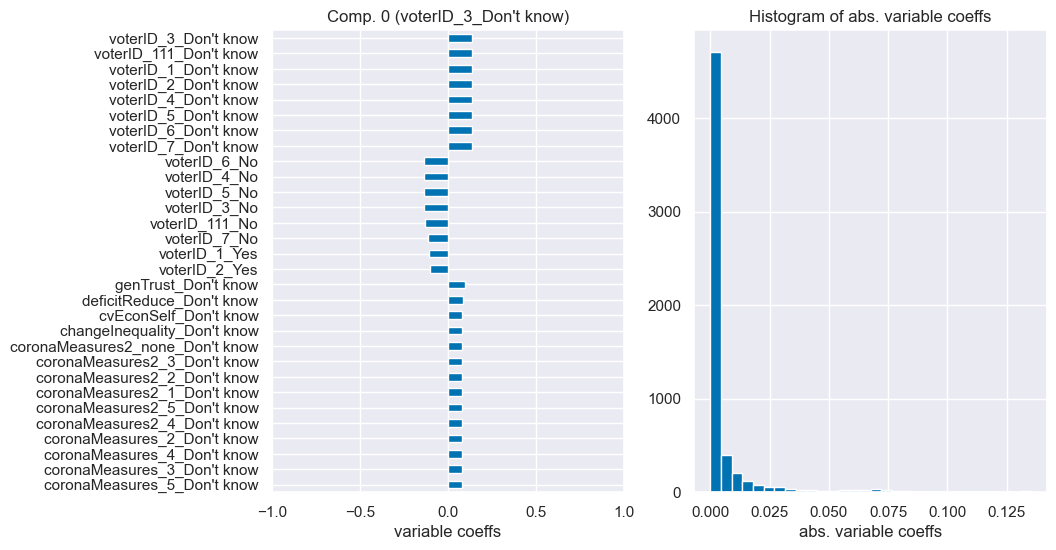

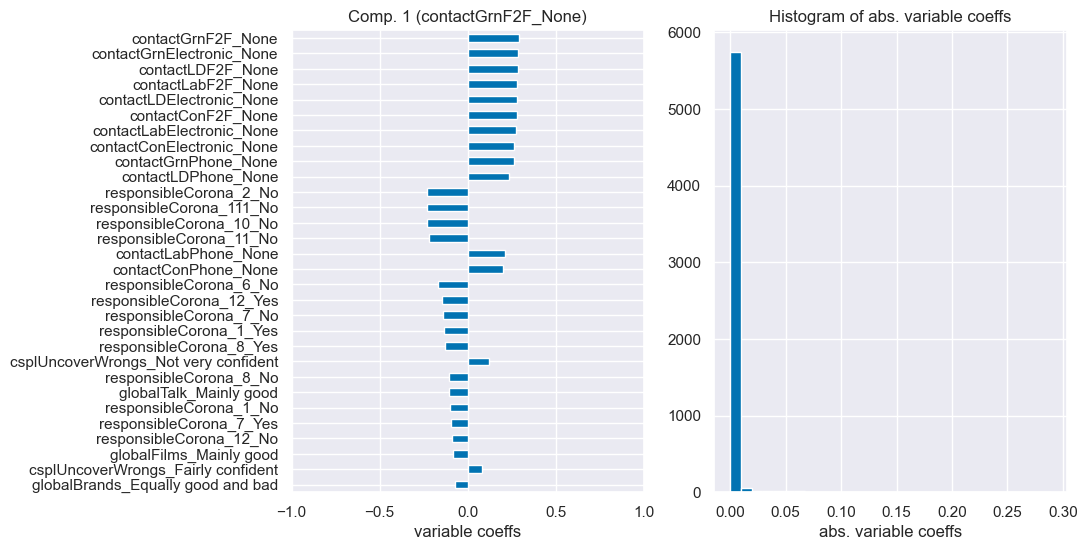

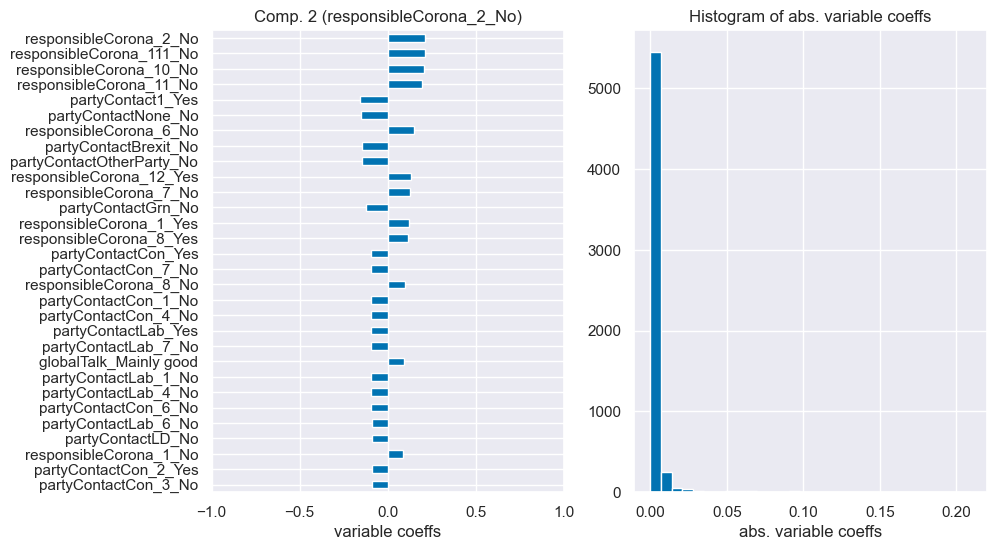

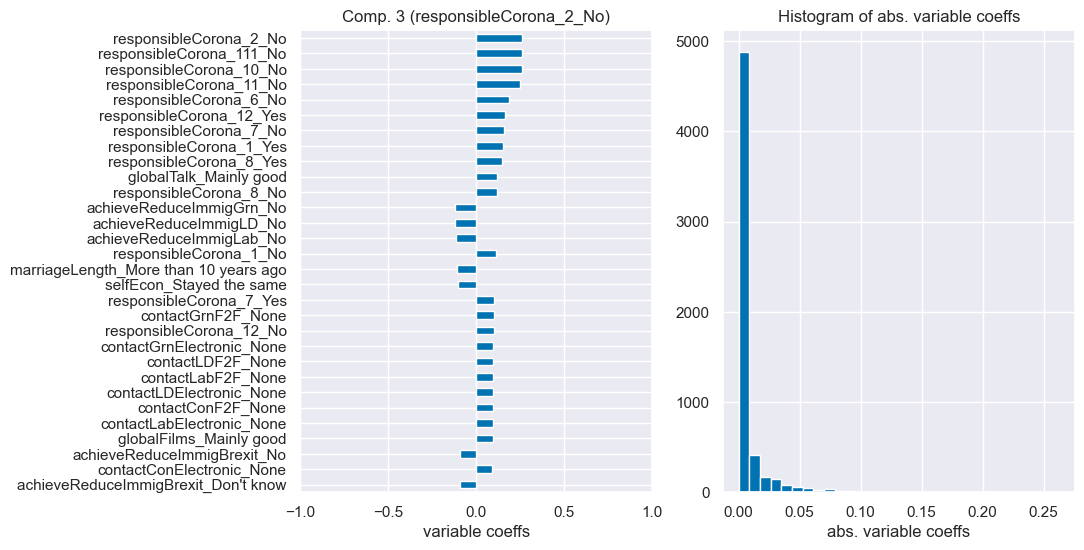

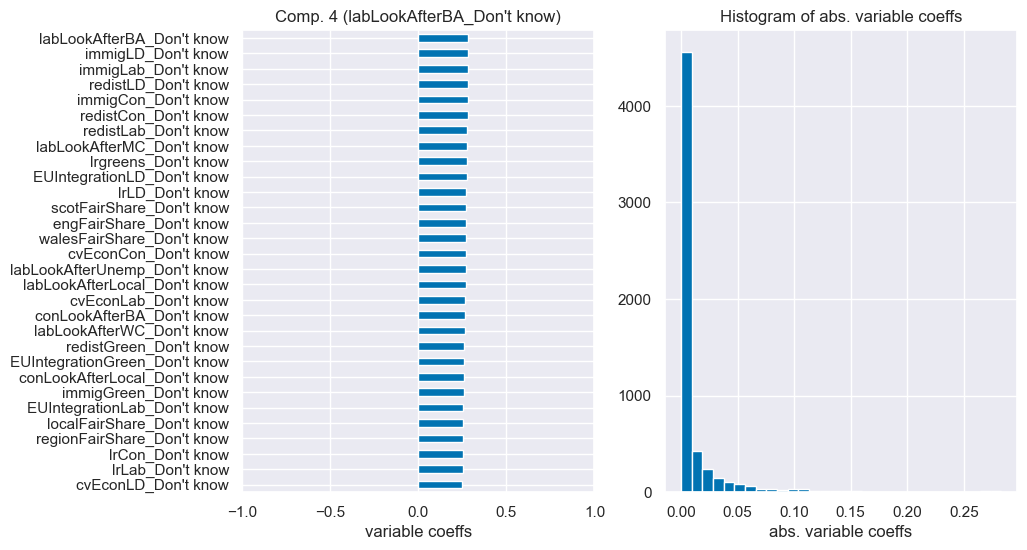

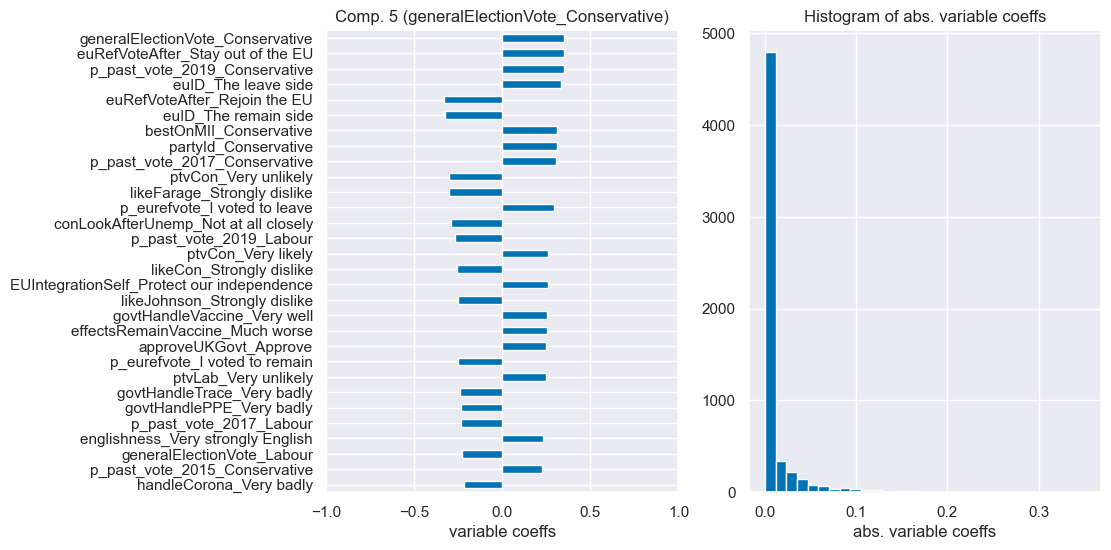

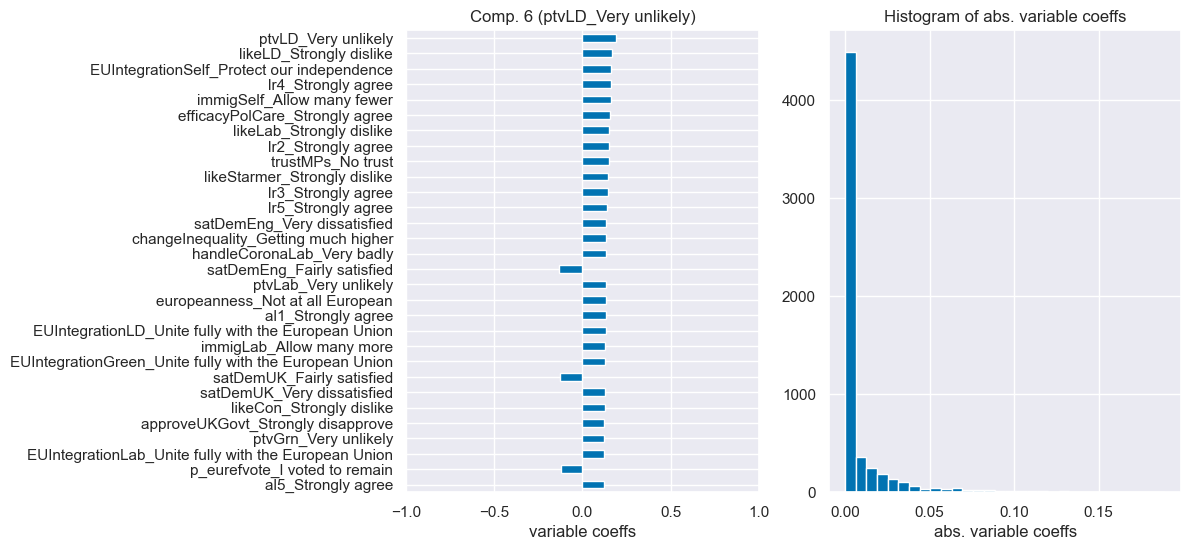

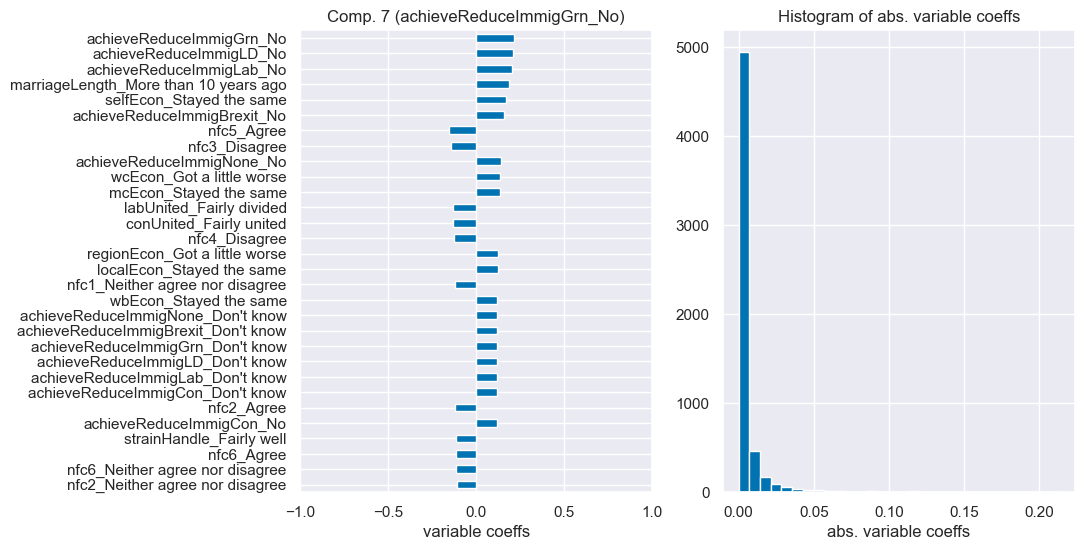

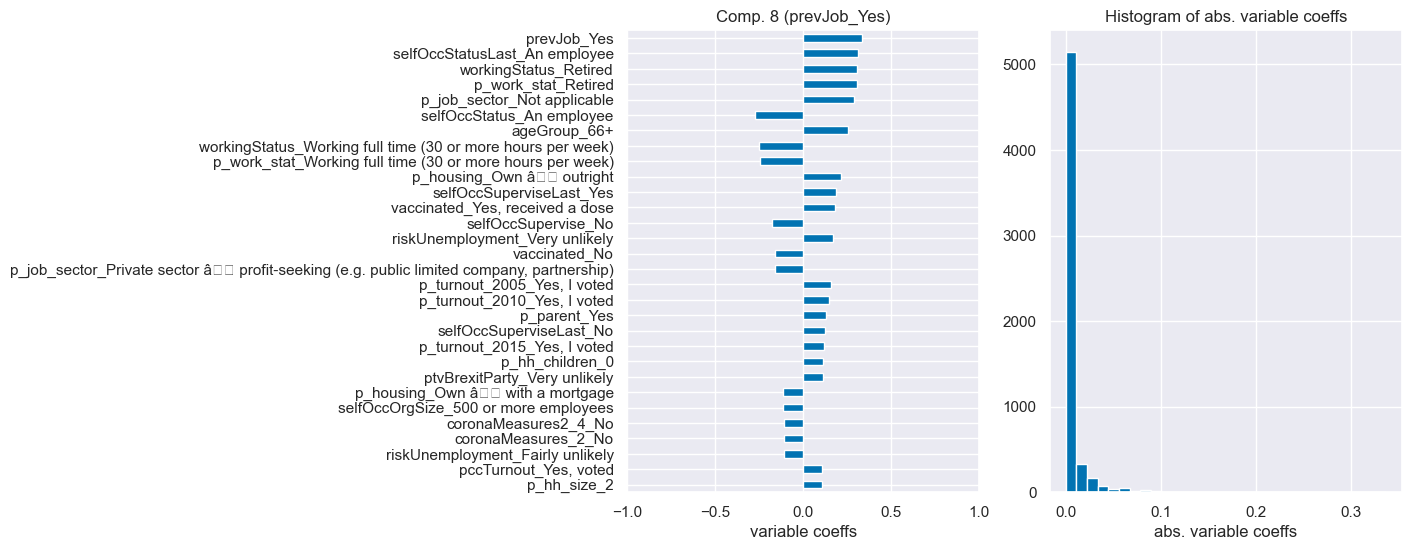

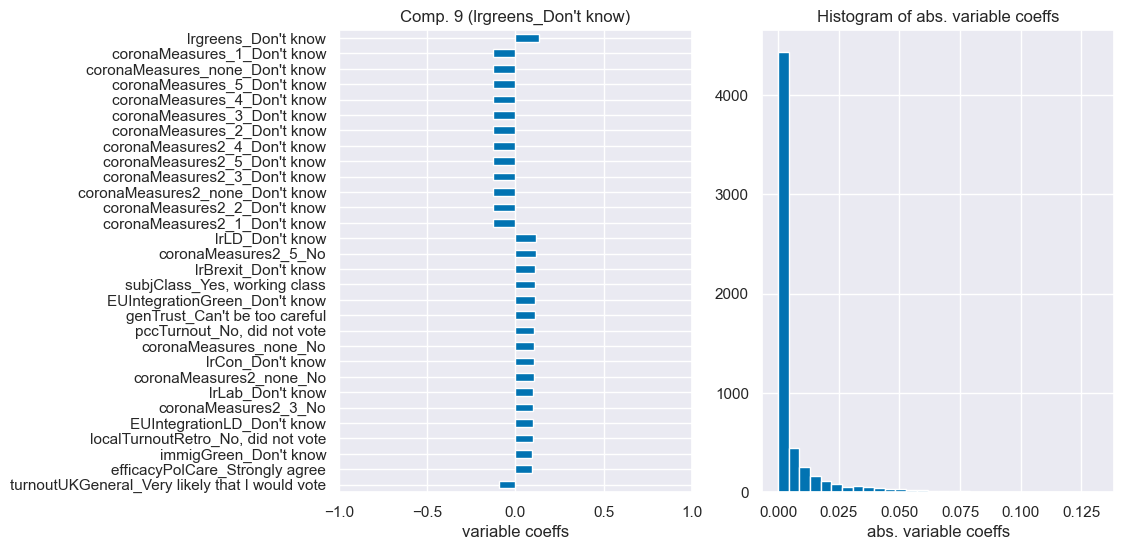

In [55]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 10

# decomp = PCA(svd_solver="full",n_components =n_components )
decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_num)
BES_decomp = decomp.transform(BES_num)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_num.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

Wall time: 54.2 s


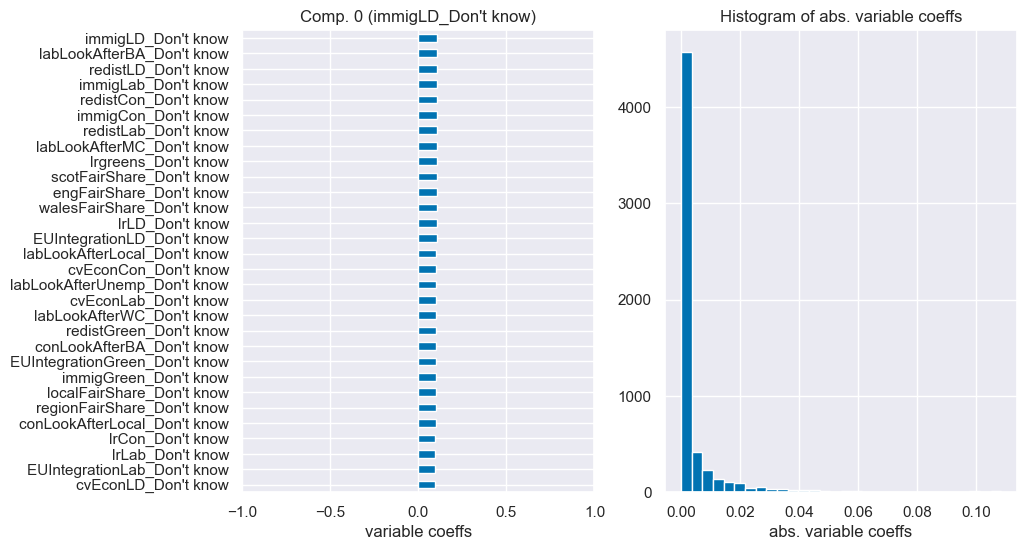

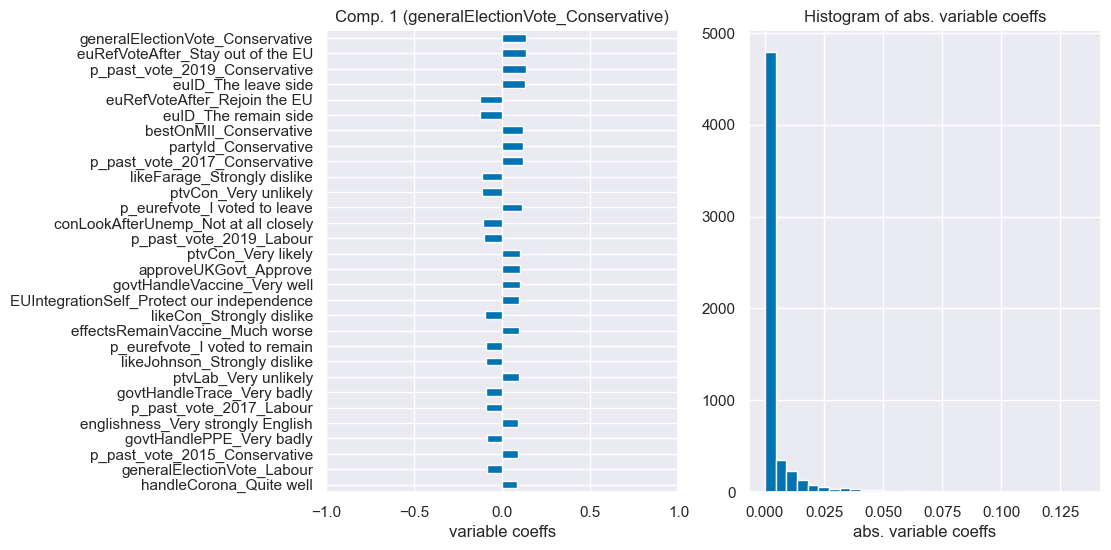

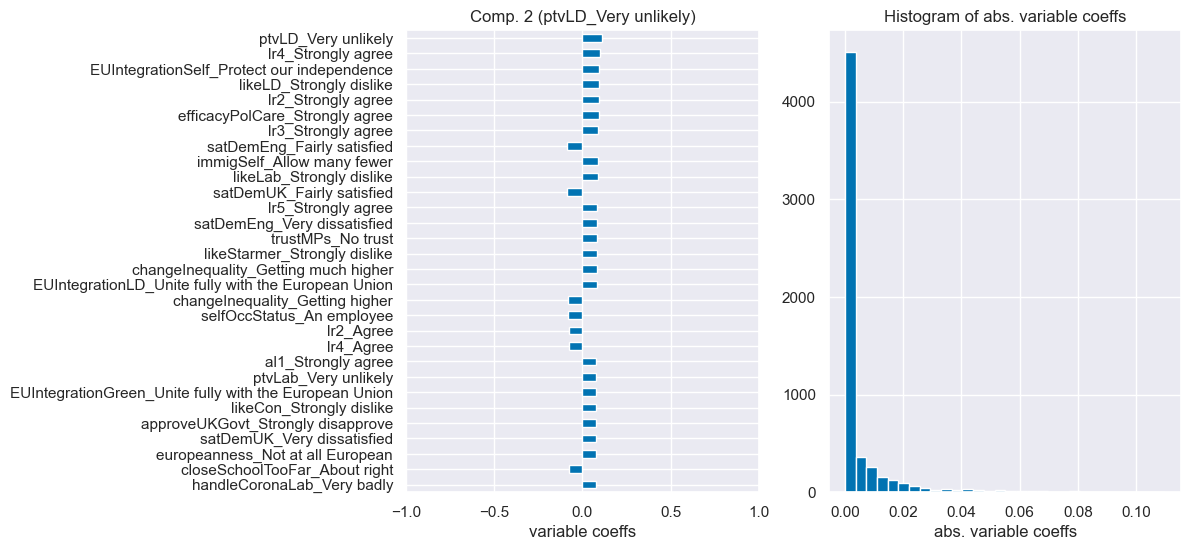

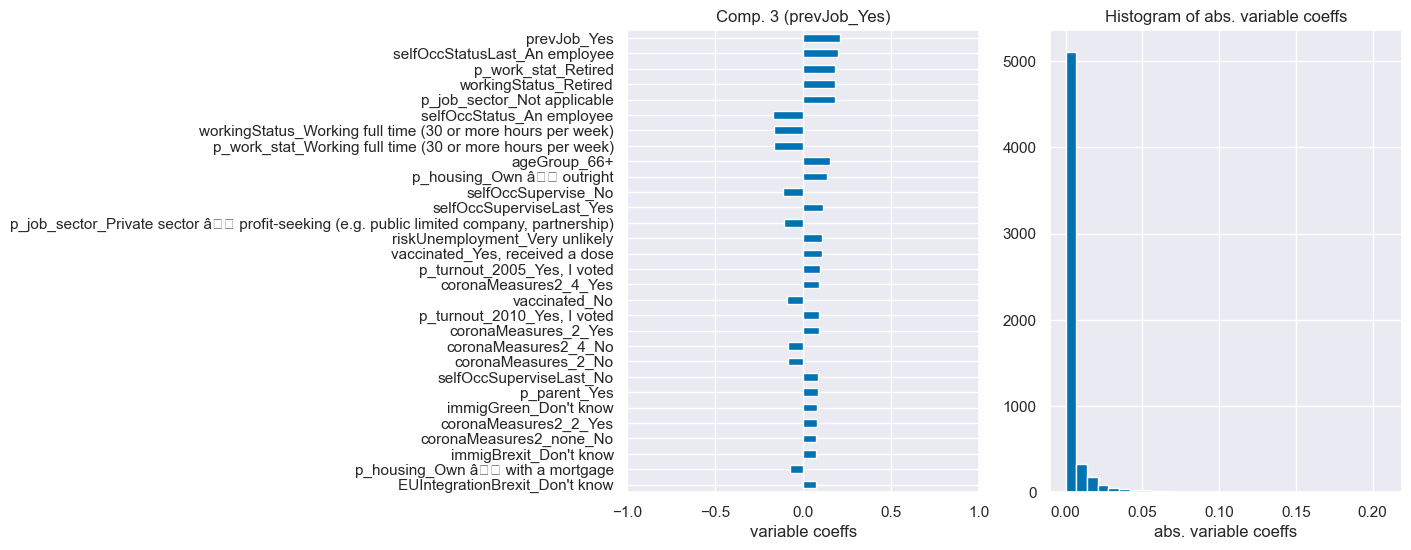

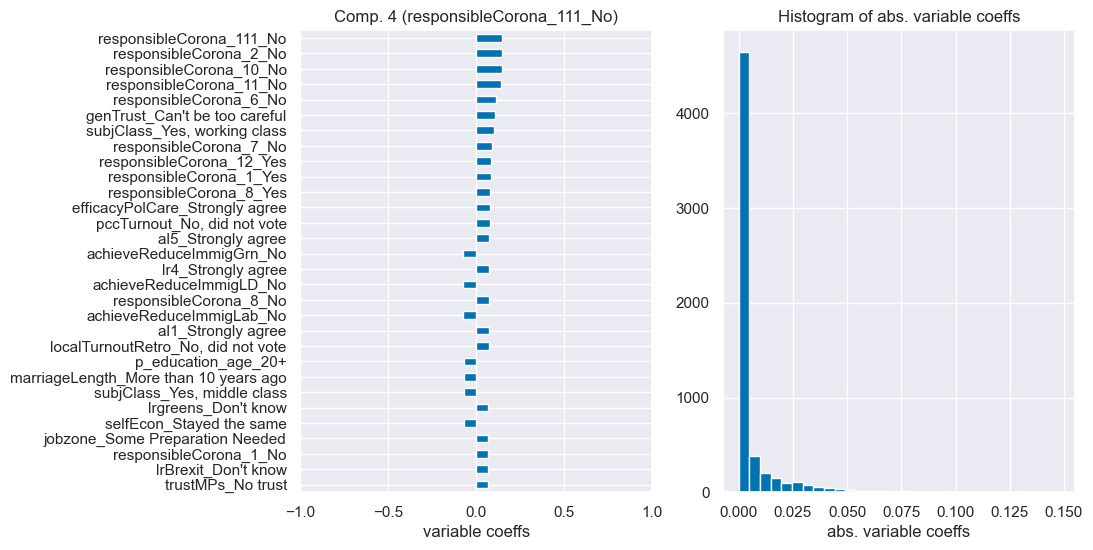

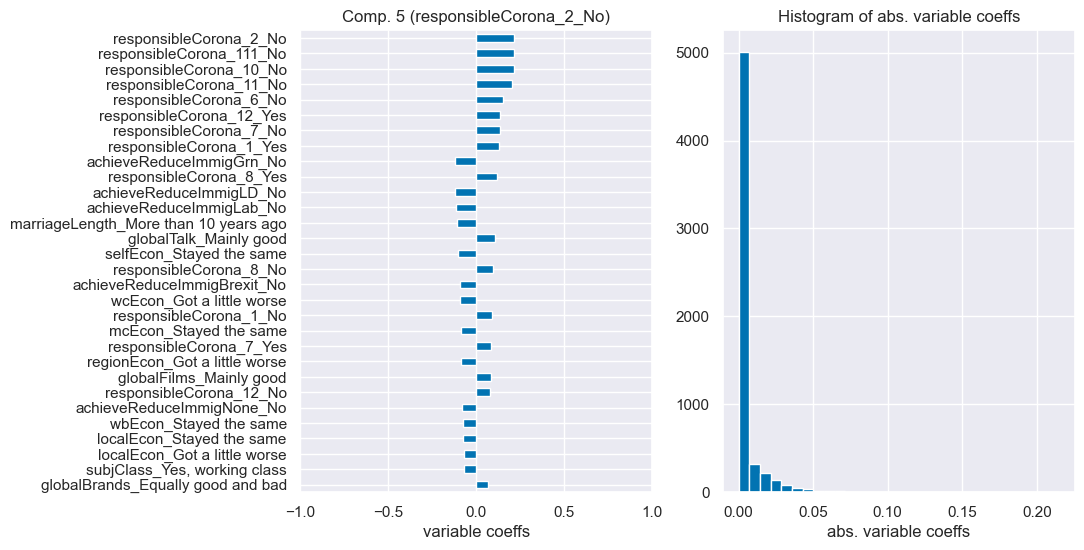

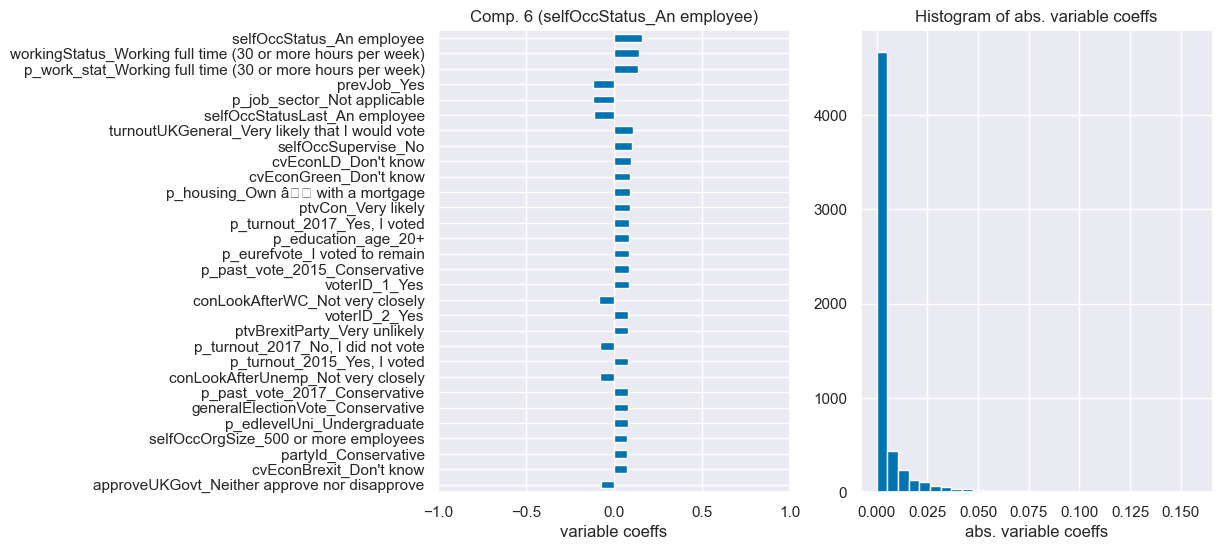

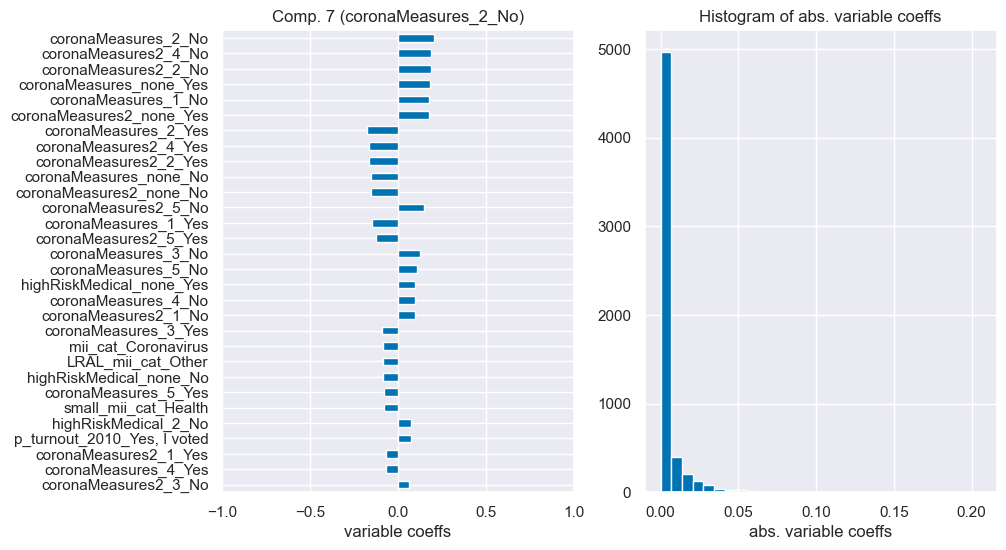

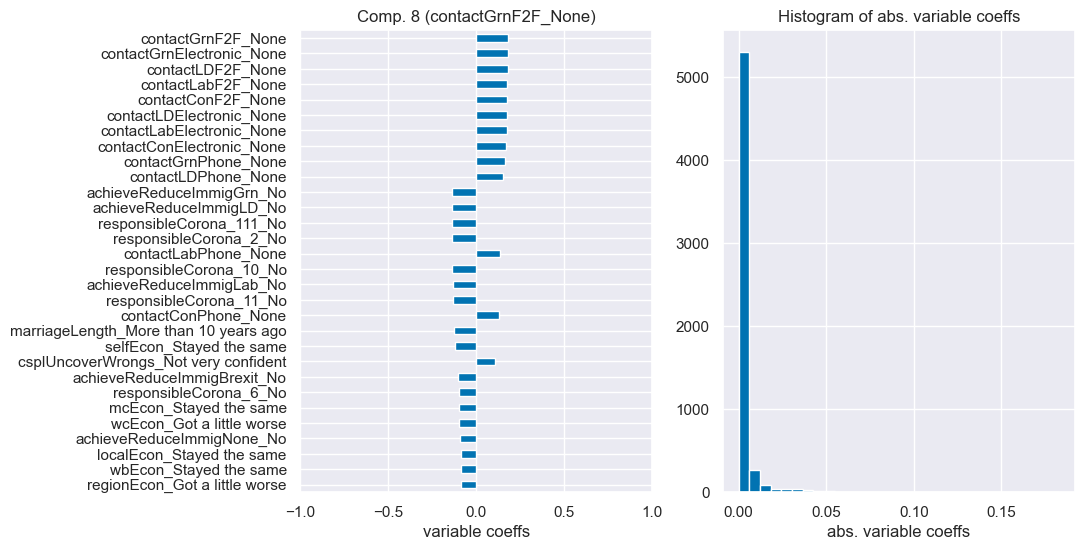

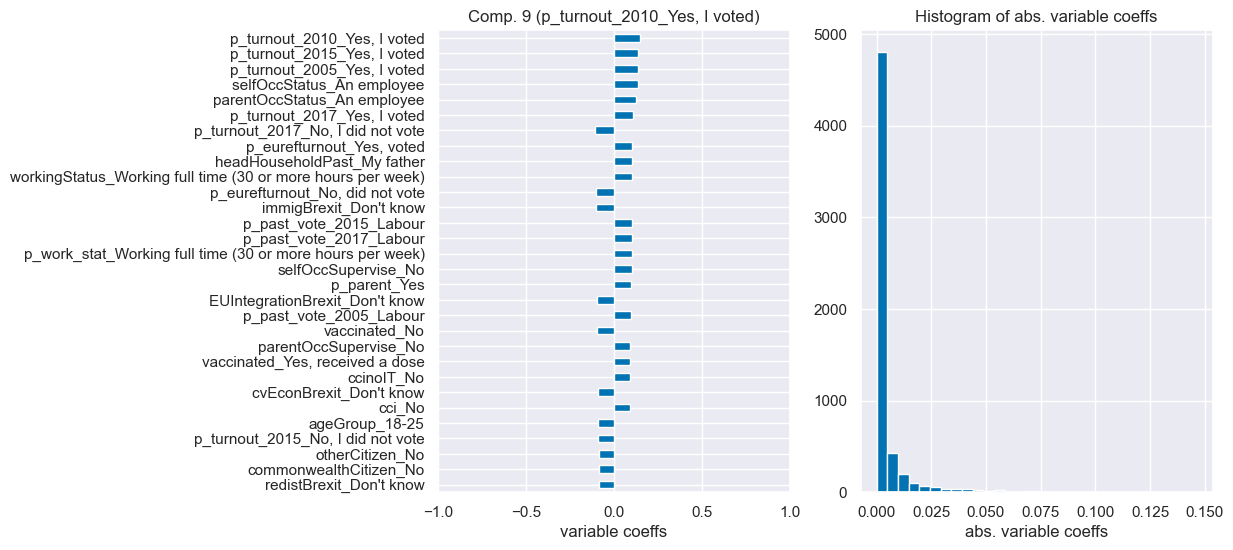

In [56]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 10

decomp = PCA(svd_solver="full",n_components =n_components )
# decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_num)
BES_decomp = decomp.transform(BES_num)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_num.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

In [ ]:
# W21
# mii_cat,small_mii_cat,LRAL_mii_cat
# london(Turnout|FirstChoice|SecondChoice|AssemblyConstituency|AssemblyWide)
# mayorTurnout,(cambridge|gm|liverpool|tees|westMid|westYork|bristol|doncaster|liverpool|salford)
# likeTice
# effectsRemain(Trade|Econ|Finance|Vaccine|CovidDeaths) worse-better if UK remained in EU
# (govt|scotgovt|welshgovt)Handle(Trace|Vaccine)
# responsibleEcon(Business|Brexit|Other) - new options for 'what changeEconomy is caused by'
# responsibleCorona_(11|12) - new options for 'what responsible for change in corona crisis' (Brexit|scientsts/vacc manufact)
# ptvAlba - ptvAlba party
# closeSchoolTooFar - closing schools to prevent coronavirus went too far
# welshReferendumIntention - welsh independence referendum
# cvEconBrexit - coronavirus Econ vs Health position Brexit Party
# voterID_X - what id do you have?
# vaccinated - have you received at least one dose/booked appt?
# vaccineHesitant - would you take a cv vaccine if offered?
# hesitantReason_X - why are you hesitant?
# snpLookAfterLocal - snp look after people in your local area?
# changeInequality - is econ ineq getting lower or higher?
# (local|region|london)FairShare - region/london constrained to be country 1|4 or gor london
# mapHouse - where wd you place your household 0 among poorest, 100 among richest
# area(RichPoor|Crime) - place local community 0-100 poorest/richest areas|lowest lvl of crime-highest lvl of crime
# amenities - how well served is your local community with amenities
# subjClassSqueeze - subjClass with squeeze (is this really new?)
# scotWording(Basic|Agree|Remain) - diff wording of independence question
# sSqueeze(1|2) - squeeze versions of Basic|Agree and Remain q above
# ukCOVIDPerform - how well has the uk perf overall in covid crisis
# handleCoronavirusRetro - same, but think back to last year
# strainHandle - how well do you think uk govt would handle new strains?
# contact<Con|Lab|LD|Grn>(F2F|Phone|Electronic) - contact from party in last 4 weeks
# nfc1-6 - Need For Cognition value variables
# (con|lab)Patriotic - how patriotic are these parties?
# statusTopBottom - self placement Bottom-Top
# status(Wealth|Education|Earnings|JobRespect|Respect) - ques text wrong, but wd assume it's where each contributes/places??
# marriageLength - how long is your relationship with your partner?
# euRefPartner|vote2019Partner - how did your partner vote in euRef/2019GE?
# parentOcc|sectorParent|parentEducation|ns_sec_parent|ns_sec_analytic_parent - parent demo variables (were they mother/father before?)
# under18 - helpful flag for earlier waves with had some under 18s
# pcon_code/oslau_code - const/place codes!

In [59]:
search(BES_num,"nfc1")

nfc1_Strongly disagree             25884
nfc1_Disagree                      25884
nfc1_Neither agree nor disagree    25884
nfc1_Agree                         25884
nfc1_Strongly agree                25884
nfc1_Don't know                    25884
dtype: int64

In [65]:
# nfc1
name="nfc1"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

Top 20 positive (spearman) correlations for nfc1 r p N 
 
 nfc5_Strongly agree 
 0.320000 
 0.00 
 6009 
 
 
 nfc6_Strongly agree 
 0.300000 
 0.00 
 6009 
 
 
 nfc2_Agree 
 0.290000 
 0.00 
 6009 
 
 
 nfc2_Strongly agree 
 0.290000 
 0.00 
 6009 
 
 
 nfc6_Agree 
 0.270000 
 0.00 
 6009 
 
 
 nfc3_Strongly disagree 
 0.260000 
 0.00 
 6009 
 
 
 nfc4_Strongly disagree 
 0.250000 
 0.00 
 6009 
 
 
 nfc5_Agree 
 0.190000 
 0.00 
 6009 
 
 
 nfc4_Disagree 
 0.180000 
 0.00 
 6009 
 
 
 p_education_age_20+ 
 0.140000 
 0.00 
 6009 
 
 
 efficacyNotUnderstand_Strongly disagree 
 0.130000 
 0.00 
 6009 
 
 
 p_education_University or CNAA higher degree (e.g.[...] 
 0.130000 
 0.00 
 6009 
 
 
 p_edlevelUni_Postgrad 
 0.130000 
 0.00 
 6009 
 
 
 p_edlevel_Postgrad 
 0.130000 
 0.00 
 6009 
 
 
 gender_Male 
 0.120000 
 0.00 
 6009 
 
 
 p_paper_read_The Guardian 
 0.110000 
 0.00 
 6009 
 
 
 jobzone_Considerable Preparation Needed 
 0.110000 
 0.00 
 6009 
 
 
 subjClass_Yes, middle class 
 0.110000 
 0.00 
 6009 
 
 
 antiIntellectual_Strongly disagree 
 0.110000 
 0.00 
 6009 
 
 
 nfc3_Disagree 
 0.110000 
 0.00 
 6009 
 
 Top 20 negative (spearman) correlations for nfc1 r p N 
 
 nfc2_Disagree 
 -0.310000 
 0.00 
 6009 
 
 
 nfc5_Disagree 
 -0.280000 
 0.00 
 6009 
 
 
 nfc6_Disagree 
 -0.270000 
 0.00 
 6009 
 
 
 nfc5_Neither agree nor disagree 
 -0.200000 
 0.00 
 6009 
 
 
 nfc2_Strongly disagree 
 -0.180000 
 0.00 
 6009 
 
 
 nfc3_Agree 
 -0.180000 
 0.00 
 6009 
 
 
 nfc4_Agree 
 -0.170000 
 0.00 
 6009 
 
 
 nfc4_Neither agree nor disagree 
 -0.170000 
 0.00 
 6009 
 
 
 nfc6_Neither agree nor disagree 
 -0.170000 
 0.00 
 6009 
 
 
 nfc3_Neither agree nor disagree 
 -0.170000 
 0.00 
 6009 
 
 
 nfc2_Neither agree nor disagree 
 -0.150000 
 0.00 
 6009 
 
 
 nfc6_Strongly disagree 
 -0.130000 
 0.00 
 6009 
 
 
 nfc5_Strongly disagree 
 -0.130000 
 0.00 
 6009 
 
 
 redistLD_Don't know 
 -0.120000 
 0.00 
 6009 
 
 
 walesFairShare_Don't know 
 -0.120000 
 0.00 
 6009 
 
 
 EUIntegrationLD_Don't know 
 -0.120000 
 0.00 
 6009 
 
 
 EUIntegrationGreen_Don't know 
 -0.120000 
 0.00 
 6009 
 
 
 scotFairShare_Don't know 
 -0.120000 
 0.00 
 6009 
 
 
 selfOccSuperviseLast_No 
 -0.120000 
 0.00 
 6009 
 
 
 gender_Female 
 -0.120000 
 0.00 
 6009

[0]	validation_0-rmse:1.76722	validation_1-rmse:1.77042
[1]	validation_0-rmse:1.70109	validation_1-rmse:1.70691
[2]	validation_0-rmse:1.63909	validation_1-rmse:1.64688
[3]	validation_0-rmse:1.58080	validation_1-rmse:1.59014
[4]	validation_0-rmse:1.52640	validation_1-rmse:1.53782
[5]	validation_0-rmse:1.47474	validation_1-rmse:1.48805
[6]	validation_0-rmse:1.42629	validation_1-rmse:1.44199
[7]	validation_0-rmse:1.38077	validation_1-rmse:1.39933
[8]	validation_0-rmse:1.33836	validation_1-rmse:1.35943
[9]	validation_0-rmse:1.29844	validation_1-rmse:1.32273
[10]	validation_0-rmse:1.26111	validation_1-rmse:1.28862
[11]	validation_0-rmse:1.22550	validation_1-rmse:1.25560
[12]	validation_0-rmse:1.19273	validation_1-rmse:1.22531
[13]	validation_0-rmse:1.16202	validation_1-rmse:1.19748
[14]	validation_0-rmse:1.13405	validation_1-rmse:1.17168
[15]	validation_0-rmse:1.10744	validation_1-rmse:1.14748
[16]	validation_0-rmse:1.08296	validation_1-rmse:1.12605
[17]	validation_0-rmse:1.06037	validation

[144]	validation_0-rmse:0.60144	validation_1-rmse:0.89009
[145]	validation_0-rmse:0.60031	validation_1-rmse:0.89027
[146]	validation_0-rmse:0.59982	validation_1-rmse:0.89061
[147]	validation_0-rmse:0.59800	validation_1-rmse:0.89070
[148]	validation_0-rmse:0.59658	validation_1-rmse:0.89036
[149]	validation_0-rmse:0.59455	validation_1-rmse:0.89026
[150]	validation_0-rmse:0.59291	validation_1-rmse:0.89047
[151]	validation_0-rmse:0.59212	validation_1-rmse:0.89040
[152]	validation_0-rmse:0.59167	validation_1-rmse:0.89062
[153]	validation_0-rmse:0.59062	validation_1-rmse:0.89069
[154]	validation_0-rmse:0.58974	validation_1-rmse:0.89069
[155]	validation_0-rmse:0.58855	validation_1-rmse:0.89083
[156]	validation_0-rmse:0.58762	validation_1-rmse:0.89099
[157]	validation_0-rmse:0.58641	validation_1-rmse:0.89110
[158]	validation_0-rmse:0.58573	validation_1-rmse:0.89119
[159]	validation_0-rmse:0.58462	validation_1-rmse:0.89115
[160]	validation_0-rmse:0.58390	validation_1-rmse:0.89121
[161]	validati

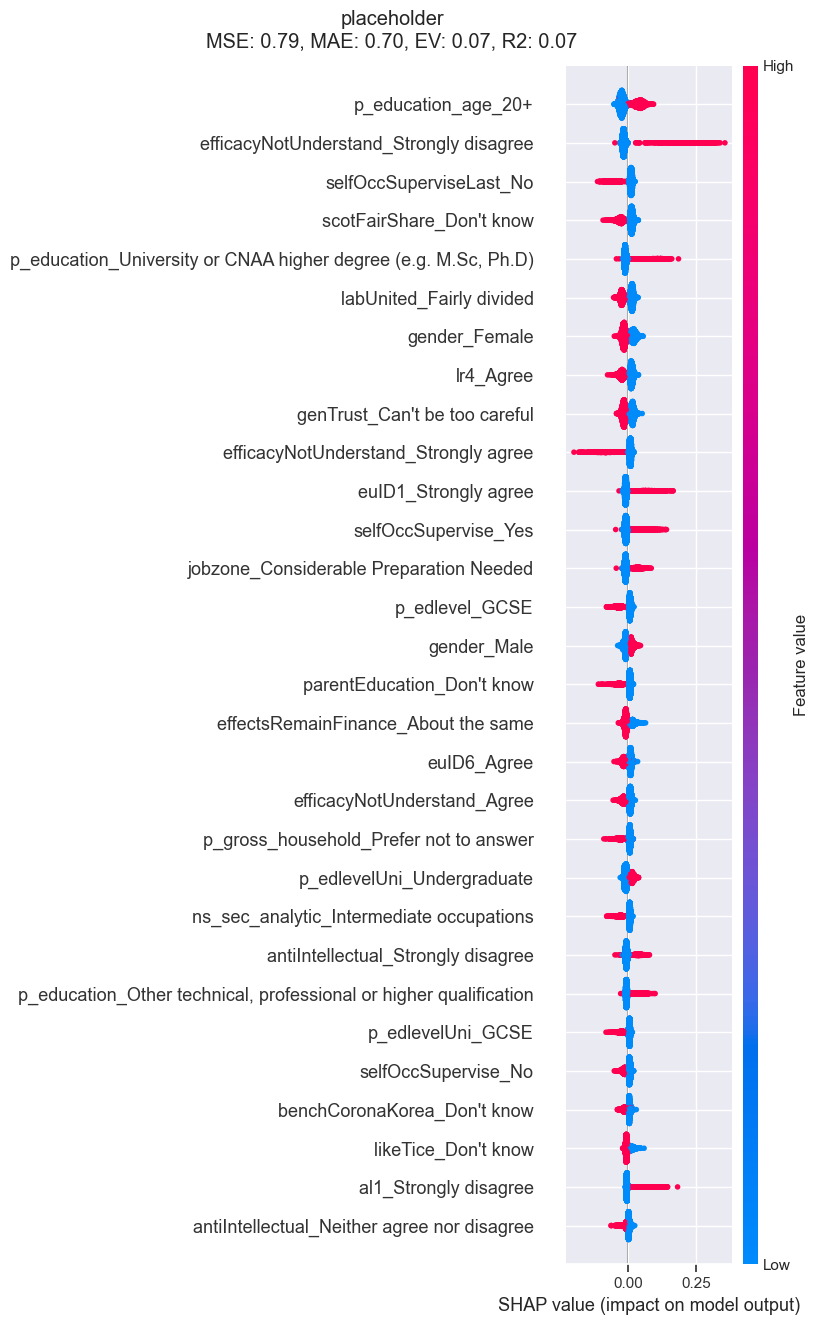

NameError: name 'train' is not defined

In [69]:
(explainer, shap_values, train.columns, train.index, alg,output_subfolder,metrics) = xgboost_run(title = "I would prefer complex to simple problems",dataset=BES_num,
                                                    var_list = ["nfc1"],var_stub_list = ["nfc"])

In [70]:
# changeInequality
name="changeInequality"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

Top 20 positive (spearman) correlations for changeInequality r p N 
 
 conLookAfterUnemp_Not at all closely 
 0.460000 
 0.00 
 23276 
 
 
 lr4_Strongly agree 
 0.460000 
 0.00 
 23276 
 
 
 lr3_Strongly agree 
 0.420000 
 0.00 
 23276 
 
 
 ptvCon_Very unlikely 
 0.410000 
 0.00 
 23276 
 
 
 conLookAfterWC_Not at all closely 
 0.400000 
 0.00 
 23276 
 
 
 likeCon_Strongly dislike 
 0.400000 
 0.00 
 23276 
 
 
 lr2_Strongly agree 
 0.400000 
 0.00 
 23276 
 
 
 govtHandlePPE_Very badly 
 0.390000 
 0.00 
 23276 
 
 
 approveUKGovt_Strongly disapprove 
 0.380000 
 0.00 
 23276 
 
 
 likeJohnson_Strongly dislike 
 0.380000 
 0.00 
 23276 
 
 
 handleCorona_Very badly 
 0.370000 
 0.00 
 23276 
 
 
 govtHandleTrace_Very badly 
 0.370000 
 0.00 
 23276 
 
 
 conLookAfterBA_Not at all closely 
 0.360000 
 0.00 
 23276 
 
 
 satDemEng_Very dissatisfied 
 0.360000 
 0.00 
 23276 
 
 
 cutsTooFarLocal_Gone much too far 
 0.340000 
 0.00 
 23276 
 
 
 lr1_Strongly agree 
 0.330000 
 0.00 
 23276 
 
 
 satDemUK_Very dissatisfied 
 0.320000 
 0.00 
 23276 
 
 
 likeFarage_Strongly dislike 
 0.320000 
 0.00 
 23276 
 
 
 p_past_vote_2019_Labour 
 0.320000 
 0.00 
 23276 
 
 
 govtHandlelockdown_Very badly 
 0.310000 
 0.00 
 23276 
 
 Top 20 negative (spearman) correlations for changeInequality r p N 
 
 generalElectionVote_Conservative 
 -0.390000 
 0.00 
 23276 
 
 
 partyId_Conservative 
 -0.360000 
 0.00 
 23276 
 
 
 bestOnMII_Conservative 
 -0.350000 
 0.00 
 23276 
 
 
 p_past_vote_2019_Conservative 
 -0.350000 
 0.00 
 23276 
 
 
 p_past_vote_2017_Conservative 
 -0.330000 
 0.00 
 23276 
 
 
 ptvCon_Very likely 
 -0.310000 
 0.00 
 23276 
 
 
 approveUKGovt_Approve 
 -0.310000 
 0.00 
 23276 
 
 
 conLookAfterWC_Fairly closely 
 -0.310000 
 0.00 
 23276 
 
 
 cutsTooFarLocal_About right 
 -0.300000 
 0.00 
 23276 
 
 
 conLookAfterUnemp_Fairly closely 
 -0.300000 
 0.00 
 23276 
 
 
 lr3_Neither agree nor disagree 
 -0.290000 
 0.00 
 23276 
 
 
 p_past_vote_2015_Conservative 
 -0.280000 
 0.00 
 23276 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.270000 
 0.00 
 23276 
 
 
 satDemUK_Fairly satisfied 
 -0.270000 
 0.00 
 23276 
 
 
 satDemEng_Fairly satisfied 
 -0.260000 
 0.00 
 23276 
 
 
 localElectionVote_Conservative 
 -0.260000 
 0.00 
 23276 
 
 
 lr4_Neither agree nor disagree 
 -0.260000 
 0.00 
 23276 
 
 
 lr3_Disagree 
 -0.260000 
 0.00 
 23276 
 
 
 conLookAfterBA_Fairly closely 
 -0.260000 
 0.00 
 23276 
 
 
 lr4_Disagree 
 -0.260000 
 0.00 
 23276

[0]	validation_0-rmse:2.44744	validation_1-rmse:2.44714
[1]	validation_0-rmse:2.33484	validation_1-rmse:2.33451
[2]	validation_0-rmse:2.22798	validation_1-rmse:2.22760
[3]	validation_0-rmse:2.12691	validation_1-rmse:2.12653
[4]	validation_0-rmse:2.03114	validation_1-rmse:2.03098
[5]	validation_0-rmse:1.94063	validation_1-rmse:1.94068
[6]	validation_0-rmse:1.85528	validation_1-rmse:1.85559
[7]	validation_0-rmse:1.77428	validation_1-rmse:1.77499
[8]	validation_0-rmse:1.69796	validation_1-rmse:1.69920
[9]	validation_0-rmse:1.62608	validation_1-rmse:1.62767
[10]	validation_0-rmse:1.55811	validation_1-rmse:1.56000
[11]	validation_0-rmse:1.49419	validation_1-rmse:1.49672
[12]	validation_0-rmse:1.43383	validation_1-rmse:1.43679
[13]	validation_0-rmse:1.37700	validation_1-rmse:1.38056
[14]	validation_0-rmse:1.32343	validation_1-rmse:1.32766
[15]	validation_0-rmse:1.27294	validation_1-rmse:1.27798
[16]	validation_0-rmse:1.22546	validation_1-rmse:1.23148
[17]	validation_0-rmse:1.18075	validation

[144]	validation_0-rmse:0.53941	validation_1-rmse:0.63891
[145]	validation_0-rmse:0.53897	validation_1-rmse:0.63887
[146]	validation_0-rmse:0.53857	validation_1-rmse:0.63896
[147]	validation_0-rmse:0.53829	validation_1-rmse:0.63899
[148]	validation_0-rmse:0.53759	validation_1-rmse:0.63901
[149]	validation_0-rmse:0.53717	validation_1-rmse:0.63894
[150]	validation_0-rmse:0.53679	validation_1-rmse:0.63899
[151]	validation_0-rmse:0.53613	validation_1-rmse:0.63899
[152]	validation_0-rmse:0.53582	validation_1-rmse:0.63891
[153]	validation_0-rmse:0.53541	validation_1-rmse:0.63898
[154]	validation_0-rmse:0.53501	validation_1-rmse:0.63881
[155]	validation_0-rmse:0.53468	validation_1-rmse:0.63879
[156]	validation_0-rmse:0.53422	validation_1-rmse:0.63877
[157]	validation_0-rmse:0.53377	validation_1-rmse:0.63876
[158]	validation_0-rmse:0.53335	validation_1-rmse:0.63867
[159]	validation_0-rmse:0.53299	validation_1-rmse:0.63868
[160]	validation_0-rmse:0.53263	validation_1-rmse:0.63864
[161]	validati

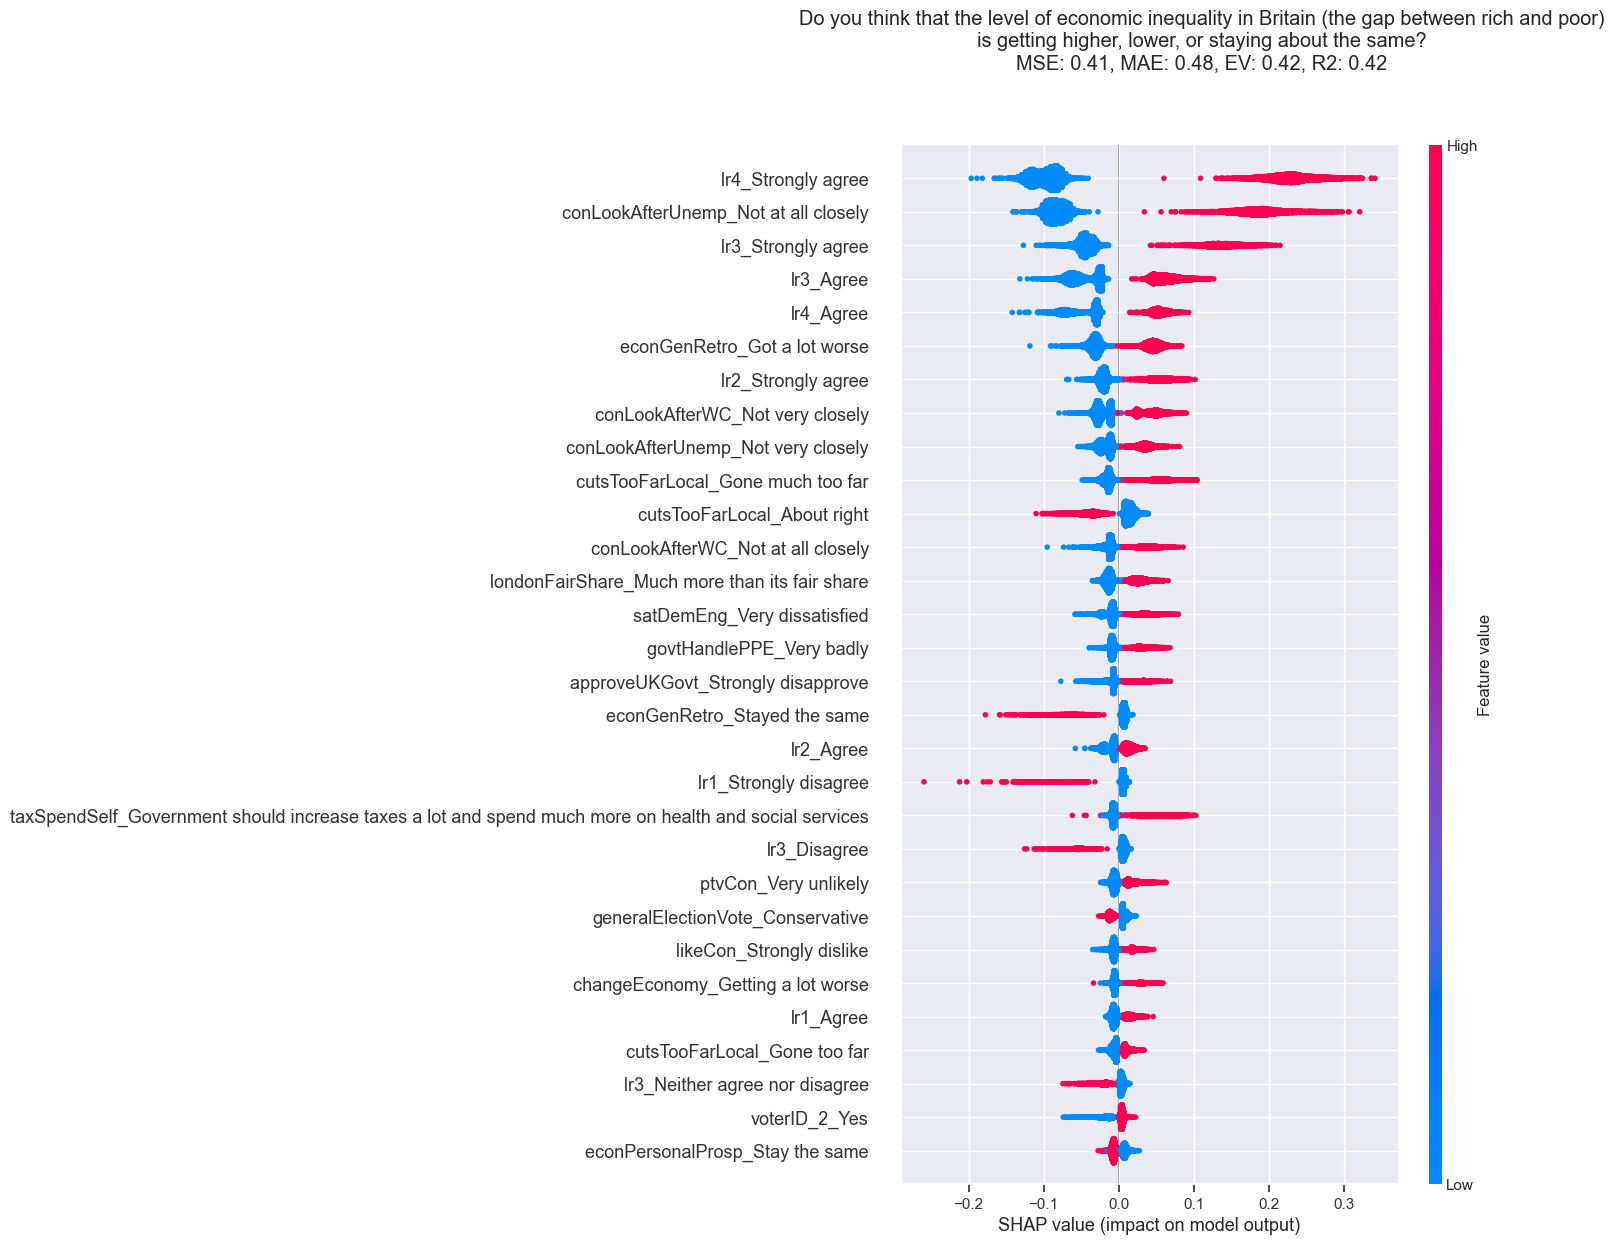

NameError: name 'train' is not defined

In [71]:
(explainer, shap_values, train.columns, train.index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Do you think that the level of economic inequality in Britain (the gap between rich and poor)\nis getting higher, lower, or staying about the same?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name])

In [72]:
# mapHouse
name="mapHouse"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

Top 20 positive (spearman) correlations for mapHouse r p N 
 
 subjClass_Yes, middle class 
 0.380000 
 0.00 
 22877 
 
 
 riskPoverty_Very unlikely 
 0.350000 
 0.00 
 22877 
 
 
 p_socgrade_A 
 0.250000 
 0.00 
 22877 
 
 
 riskUnemployment_Very unlikely 
 0.220000 
 0.00 
 22877 
 
 
 voterID_1_Yes 
 0.200000 
 0.00 
 22877 
 
 
 p_gross_household_Â£70,000 to Â£99,999 per year 
 0.200000 
 0.00 
 22877 
 
 
 p_marital_Married 
 0.190000 
 0.00 
 22877 
 
 
 conLookAfterLocal_Fairly closely 
 0.190000 
 0.00 
 22877 
 
 
 p_housing_Own â outright 
 0.190000 
 0.00 
 22877 
 
 
 p_education_age_20+ 
 0.180000 
 0.00 
 22877 
 
 
 ns_sec_analytic_Higher professional occupations 
 0.180000 
 0.00 
 22877 
 
 
 p_gross_household_Â£100,000 to Â£149,999 per year 
 0.180000 
 0.00 
 22877 
 
 
 p_past_vote_2015_Conservative 
 0.180000 
 0.00 
 22877 
 
 
 localFairShare_More or less its fair share 
 0.170000 
 0.00 
 22877 
 
 
 genTrust_Most people can be trusted 
 0.170000 
 0.00 
 22877 
 
 
 statusWealth_7 
 0.170000 
 0.00 
 22877 
 
 
 partyId_Conservative 
 0.170000 
 0.00 
 22877 
 
 
 turnoutUKGeneral_Very likely that I would vote 
 0.160000 
 0.00 
 22877 
 
 
 efficacyPolCare_Disagree 
 0.160000 
 0.00 
 22877 
 
 
 mapRepresent_Somewhat 
 0.160000 
 0.00 
 22877 
 
 Top 20 negative (spearman) correlations for mapHouse r p N 
 
 subjClass_Yes, working class 
 -0.290000 
 0.00 
 22877 
 
 
 p_socgrade_E 
 -0.230000 
 0.00 
 22877 
 
 
 lr3_Strongly agree 
 -0.210000 
 0.00 
 22877 
 
 
 efficacyPolCare_Strongly agree 
 -0.210000 
 0.00 
 22877 
 
 
 lr4_Strongly agree 
 -0.210000 
 0.00 
 22877 
 
 
 voterID_1_No 
 -0.200000 
 0.00 
 22877 
 
 
 riskPoverty_Fairly likely 
 -0.200000 
 0.00 
 22877 
 
 
 riskPoverty_Very likely 
 -0.190000 
 0.00 
 22877 
 
 
 p_housing_Rent â from a housing association 
 -0.190000 
 0.00 
 22877 
 
 
 redistSelf_Government should try to make incomes[...] 
 -0.190000 
 0.00 
 22877 
 
 
 lr5_Strongly agree 
 -0.190000 
 0.00 
 22877 
 
 
 econPersonalRetro_Got a lot worse 
 -0.190000 
 0.00 
 22877 
 
 
 workingStatus_Not in paid work for any other[...] 
 -0.190000 
 0.00 
 22877 
 
 
 changeInequality 
 -0.190000 
 0.00 
 21328 
 
 
 econPersonalProsp_Get a lot worse 
 -0.190000 
 0.00 
 22877 
 
 
 p_gross_household_Â£10,000 to Â£14,999 per year 
 -0.180000 
 0.00 
 22877 
 
 
 p_housing_Rent â from my local authority 
 -0.180000 
 0.00 
 22877 
 
 
 jobzone_Some Preparation Needed 
 -0.180000 
 0.00 
 22877 
 
 
 lr2_Strongly agree 
 -0.180000 
 0.00 
 22877 
 
 
 trustMPs_No trust 
 -0.180000 
 0.00 
 22877

[0]	validation_0-rmse:47.88835	validation_1-rmse:47.94169
[1]	validation_0-rmse:45.74864	validation_1-rmse:45.80902
[2]	validation_0-rmse:43.73286	validation_1-rmse:43.80415
[3]	validation_0-rmse:41.82513	validation_1-rmse:41.90185
[4]	validation_0-rmse:40.02696	validation_1-rmse:40.10869
[5]	validation_0-rmse:38.33187	validation_1-rmse:38.42269
[6]	validation_0-rmse:36.72092	validation_1-rmse:36.81408
[7]	validation_0-rmse:35.21146	validation_1-rmse:35.31168
[8]	validation_0-rmse:33.77314	validation_1-rmse:33.88265
[9]	validation_0-rmse:32.42313	validation_1-rmse:32.54371
[10]	validation_0-rmse:31.16365	validation_1-rmse:31.29245
[11]	validation_0-rmse:29.96736	validation_1-rmse:30.10974
[12]	validation_0-rmse:28.83670	validation_1-rmse:28.99131
[13]	validation_0-rmse:27.78133	validation_1-rmse:27.95202
[14]	validation_0-rmse:26.78296	validation_1-rmse:26.97045
[15]	validation_0-rmse:25.85562	validation_1-rmse:26.05519
[16]	validation_0-rmse:24.98780	validation_1-rmse:25.20100
[17]	va

[139]	validation_0-rmse:11.93853	validation_1-rmse:13.46011
[140]	validation_0-rmse:11.92798	validation_1-rmse:13.45428
[141]	validation_0-rmse:11.91830	validation_1-rmse:13.44902
[142]	validation_0-rmse:11.90762	validation_1-rmse:13.44298
[143]	validation_0-rmse:11.89302	validation_1-rmse:13.43762
[144]	validation_0-rmse:11.88273	validation_1-rmse:13.43288
[145]	validation_0-rmse:11.87317	validation_1-rmse:13.42642
[146]	validation_0-rmse:11.86466	validation_1-rmse:13.42159
[147]	validation_0-rmse:11.85445	validation_1-rmse:13.41557
[148]	validation_0-rmse:11.84523	validation_1-rmse:13.41033
[149]	validation_0-rmse:11.83707	validation_1-rmse:13.40624
[150]	validation_0-rmse:11.82652	validation_1-rmse:13.40139
[151]	validation_0-rmse:11.81625	validation_1-rmse:13.39641
[152]	validation_0-rmse:11.80668	validation_1-rmse:13.38832
[153]	validation_0-rmse:11.79682	validation_1-rmse:13.38522
[154]	validation_0-rmse:11.78472	validation_1-rmse:13.38317
[155]	validation_0-rmse:11.77186	validat

[276]	validation_0-rmse:10.72699	validation_1-rmse:13.02174
[277]	validation_0-rmse:10.72058	validation_1-rmse:13.01999
[278]	validation_0-rmse:10.71431	validation_1-rmse:13.01940
[279]	validation_0-rmse:10.70718	validation_1-rmse:13.01718
[280]	validation_0-rmse:10.69661	validation_1-rmse:13.01609
[281]	validation_0-rmse:10.68917	validation_1-rmse:13.01536
[282]	validation_0-rmse:10.68158	validation_1-rmse:13.01534
[283]	validation_0-rmse:10.67499	validation_1-rmse:13.01231
[284]	validation_0-rmse:10.66514	validation_1-rmse:13.00894
[285]	validation_0-rmse:10.65877	validation_1-rmse:13.00751
[286]	validation_0-rmse:10.65045	validation_1-rmse:13.00427
[287]	validation_0-rmse:10.64473	validation_1-rmse:13.00148
[288]	validation_0-rmse:10.63836	validation_1-rmse:12.99989
[289]	validation_0-rmse:10.62585	validation_1-rmse:12.99961
[290]	validation_0-rmse:10.61981	validation_1-rmse:12.99777
[291]	validation_0-rmse:10.61523	validation_1-rmse:12.99596
[292]	validation_0-rmse:10.60527	validat

[414]	validation_0-rmse:9.76360	validation_1-rmse:12.85844
[415]	validation_0-rmse:9.75915	validation_1-rmse:12.85628
[416]	validation_0-rmse:9.75367	validation_1-rmse:12.85455
[417]	validation_0-rmse:9.74739	validation_1-rmse:12.85449
[418]	validation_0-rmse:9.74086	validation_1-rmse:12.85389
[419]	validation_0-rmse:9.73617	validation_1-rmse:12.85248
[420]	validation_0-rmse:9.72693	validation_1-rmse:12.85229
[421]	validation_0-rmse:9.71901	validation_1-rmse:12.85037
[422]	validation_0-rmse:9.71292	validation_1-rmse:12.84934
[423]	validation_0-rmse:9.70953	validation_1-rmse:12.84779
[424]	validation_0-rmse:9.70507	validation_1-rmse:12.84688
[425]	validation_0-rmse:9.70078	validation_1-rmse:12.84568
[426]	validation_0-rmse:9.69390	validation_1-rmse:12.84533
[427]	validation_0-rmse:9.68942	validation_1-rmse:12.84506
[428]	validation_0-rmse:9.68424	validation_1-rmse:12.84444
[429]	validation_0-rmse:9.68013	validation_1-rmse:12.84357
[430]	validation_0-rmse:9.67450	validation_1-rmse:12.843

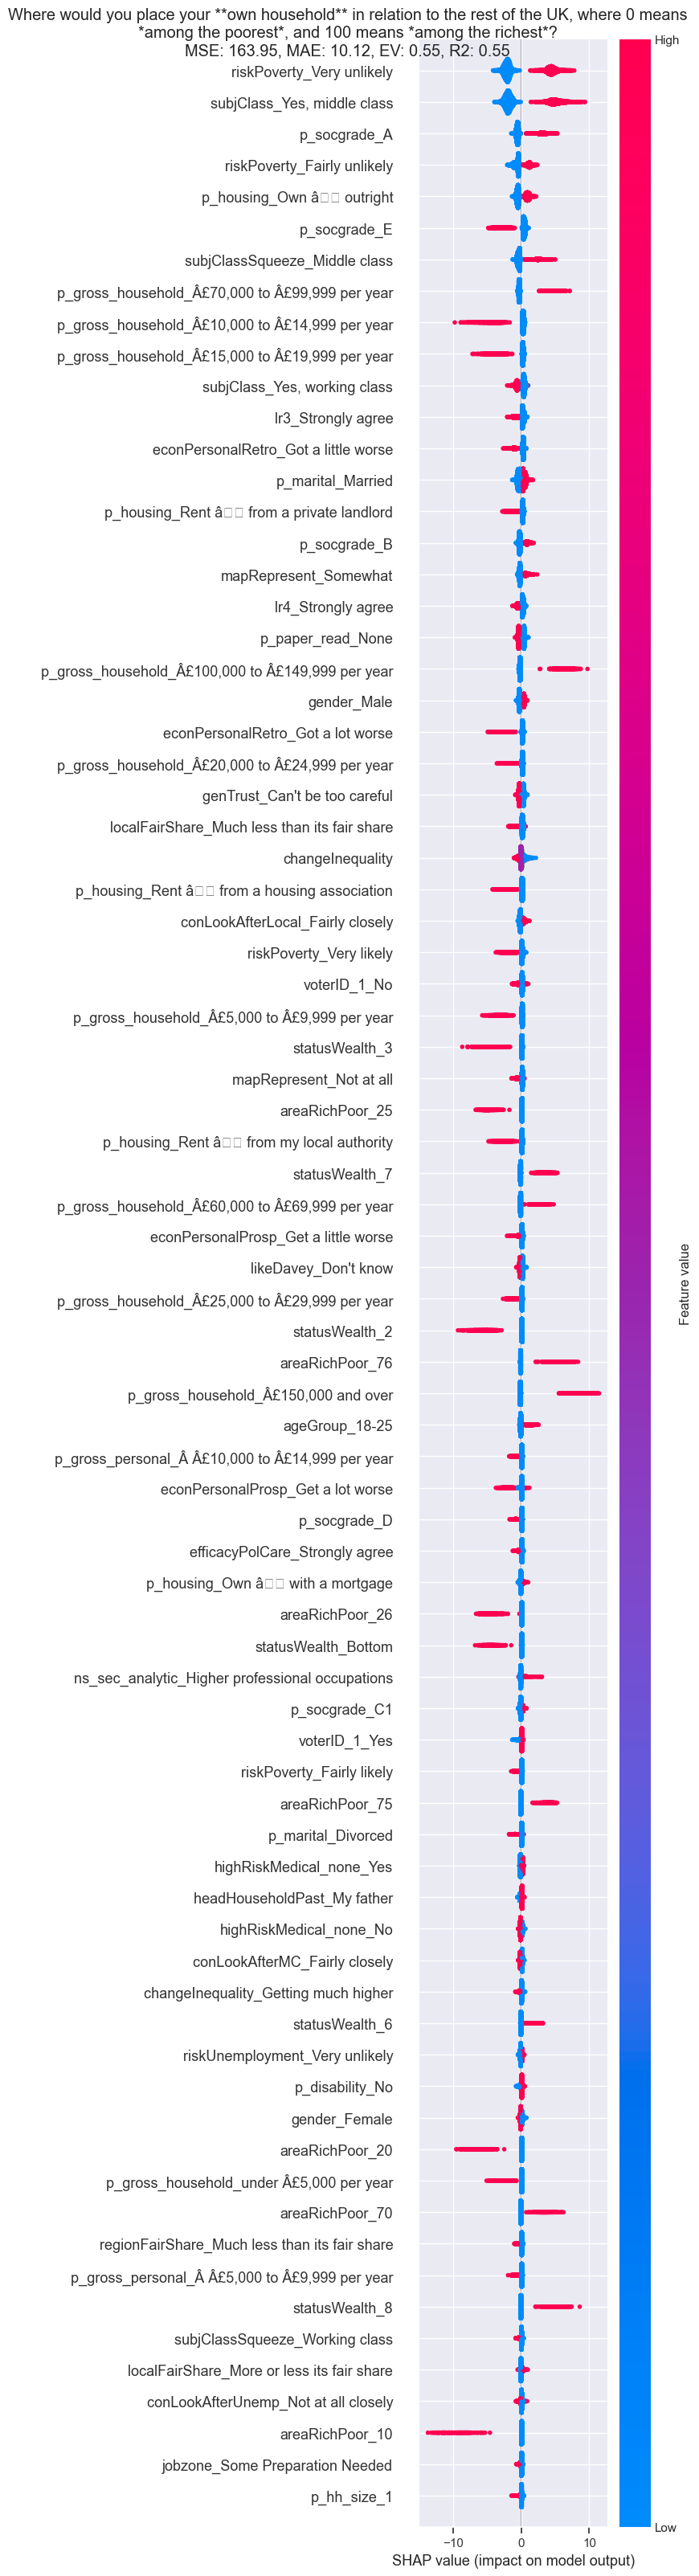

NameError: name 'train' is not defined

In [73]:
(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Where would you place your **own household** in relation to the rest of the UK, where 0 means\n*among the poorest*, and 100 means *among the richest*?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=1)

In [74]:
# statusTopBottom
name="statusTopBottom"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

Top 20 positive (spearman) correlations for statusTopBottom r p N 
 
 mapHouse 
 0.660000 
 0.00 
 4632 
 
 
 subjClass_Yes, middle class 
 0.400000 
 0.00 
 4853 
 
 
 statusWealth_7 
 0.370000 
 0.00 
 4853 
 
 
 statusEarnings_7 
 0.310000 
 0.00 
 4853 
 
 
 riskPoverty_Very unlikely 
 0.300000 
 0.00 
 4853 
 
 
 p_socgrade_A 
 0.240000 
 0.00 
 4853 
 
 
 statusRespect_8 
 0.240000 
 0.00 
 4853 
 
 
 statusWealth_6 
 0.230000 
 0.00 
 4853 
 
 
 statusWealth_8 
 0.230000 
 0.00 
 4853 
 
 
 statusEducation_9 
 0.220000 
 0.00 
 4853 
 
 
 voterID_1_Yes 
 0.220000 
 0.00 
 4853 
 
 
 statusEarnings_8 
 0.220000 
 0.00 
 4853 
 
 
 statusRespect_7 
 0.210000 
 0.00 
 4853 
 
 
 statusEducation_8 
 0.210000 
 0.00 
 4853 
 
 
 riskUnemployment_Very unlikely 
 0.210000 
 0.00 
 4853 
 
 
 partyId_Conservative 
 0.210000 
 0.00 
 4853 
 
 
 statusEarnings_6 
 0.210000 
 0.00 
 4853 
 
 
 p_past_vote_2015_Conservative 
 0.210000 
 0.00 
 4853 
 
 
 genTrust_Most people can be trusted 
 0.200000 
 0.00 
 4853 
 
 
 statusJobRespect_8 
 0.200000 
 0.00 
 4853 
 
 Top 20 negative (spearman) correlations for statusTopBottom r p N 
 
 subjClass_Yes, working class 
 -0.300000 
 0.00 
 4853 
 
 
 statusWealth_Bottom 
 -0.300000 
 0.00 
 4853 
 
 
 statusEarnings_Bottom 
 -0.290000 
 0.00 
 4853 
 
 
 statusWealth_2 
 -0.280000 
 0.00 
 4853 
 
 
 statusWealth_3 
 -0.270000 
 0.00 
 4853 
 
 
 statusEarnings_2 
 -0.260000 
 0.00 
 4853 
 
 
 efficacyPolCare_Strongly agree 
 -0.250000 
 0.00 
 4853 
 
 
 lr4_Strongly agree 
 -0.230000 
 0.00 
 4853 
 
 
 statusEarnings_3 
 -0.230000 
 0.00 
 4853 
 
 
 lr3_Strongly agree 
 -0.230000 
 0.00 
 4853 
 
 
 lr5_Strongly agree 
 -0.230000 
 0.00 
 4853 
 
 
 voterID_1_No 
 -0.220000 
 0.00 
 4853 
 
 
 statusRespect_Bottom 
 -0.210000 
 0.00 
 4853 
 
 
 statusRespect_3 
 -0.210000 
 0.00 
 4853 
 
 
 workingStatus_Not in paid work for any other[...] 
 -0.200000 
 0.00 
 4853 
 
 
 p_socgrade_E 
 -0.200000 
 0.00 
 4853 
 
 
 lr2_Strongly agree 
 -0.200000 
 0.00 
 4853 
 
 
 trustMPs_No trust 
 -0.190000 
 0.00 
 4853 
 
 
 statusEducation_4 
 -0.190000 
 0.00 
 4853 
 
 
 localFairShare_Much less than its fair share 
 -0.190000 
 0.00 
 4853

[0]	validation_0-rmse:3.99243	validation_1-rmse:3.99591
[1]	validation_0-rmse:3.81375	validation_1-rmse:3.81746
[2]	validation_0-rmse:3.64017	validation_1-rmse:3.64339
[3]	validation_0-rmse:3.47761	validation_1-rmse:3.48082
[4]	validation_0-rmse:3.32252	validation_1-rmse:3.32578
[5]	validation_0-rmse:3.17599	validation_1-rmse:3.18115
[6]	validation_0-rmse:3.03766	validation_1-rmse:3.04261
[7]	validation_0-rmse:2.90677	validation_1-rmse:2.91098
[8]	validation_0-rmse:2.78392	validation_1-rmse:2.78908
[9]	validation_0-rmse:2.66631	validation_1-rmse:2.67266
[10]	validation_0-rmse:2.55509	validation_1-rmse:2.56296
[11]	validation_0-rmse:2.45008	validation_1-rmse:2.45884
[12]	validation_0-rmse:2.35084	validation_1-rmse:2.36125
[13]	validation_0-rmse:2.25754	validation_1-rmse:2.27051
[14]	validation_0-rmse:2.16950	validation_1-rmse:2.18438
[15]	validation_0-rmse:2.08607	validation_1-rmse:2.10320
[16]	validation_0-rmse:2.00571	validation_1-rmse:2.02494
[17]	validation_0-rmse:1.93177	validation

[144]	validation_0-rmse:0.66028	validation_1-rmse:1.03590
[145]	validation_0-rmse:0.65884	validation_1-rmse:1.03603
[146]	validation_0-rmse:0.65682	validation_1-rmse:1.03616
[147]	validation_0-rmse:0.65599	validation_1-rmse:1.03636
[148]	validation_0-rmse:0.65518	validation_1-rmse:1.03642
[149]	validation_0-rmse:0.65438	validation_1-rmse:1.03634
[150]	validation_0-rmse:0.65282	validation_1-rmse:1.03607
[151]	validation_0-rmse:0.65169	validation_1-rmse:1.03609
[152]	validation_0-rmse:0.64966	validation_1-rmse:1.03579
[153]	validation_0-rmse:0.64776	validation_1-rmse:1.03602
[154]	validation_0-rmse:0.64658	validation_1-rmse:1.03590
[155]	validation_0-rmse:0.64427	validation_1-rmse:1.03593
[156]	validation_0-rmse:0.64260	validation_1-rmse:1.03584
[157]	validation_0-rmse:0.64128	validation_1-rmse:1.03591
[158]	validation_0-rmse:0.63894	validation_1-rmse:1.03566
MSE: 1.07, MAE: 0.78, EV: 0.59, R2: 0.59


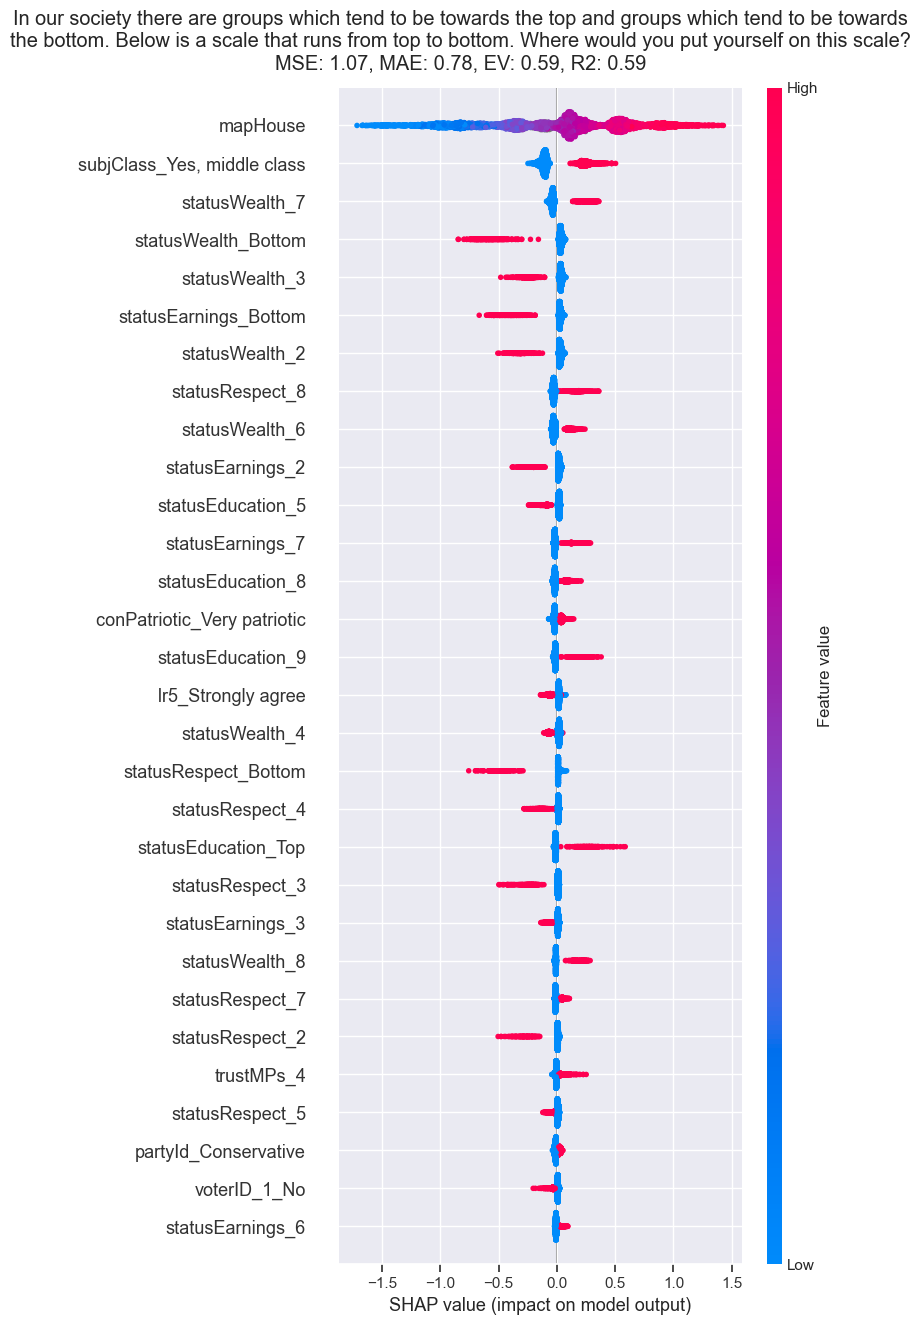

In [75]:
(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "In our society there are groups which tend to be towards the top and groups which tend to be towards\nthe bottom. Below is a scale that runs from top to bottom. Where would you put yourself on this scale?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=1)

Top 20 positive (spearman) correlations for marriageLength r p N 
 
 p_marital_Married 
 0.540000 
 0.00 
 4352 
 
 
 vaccinated_Yes, received a dose 
 0.420000 
 0.00 
 4352 
 
 
 p_parent_Yes 
 0.370000 
 0.00 
 4352 
 
 
 p_housing_Own â outright 
 0.340000 
 0.00 
 4352 
 
 
 workingStatus_Retired 
 0.320000 
 0.00 
 4352 
 
 
 prevJob_Yes 
 0.310000 
 0.00 
 4352 
 
 
 p_work_stat_Retired 
 0.310000 
 0.00 
 4352 
 
 
 p_turnout_2005_Yes, I voted 
 0.310000 
 0.00 
 4352 
 
 
 p_turnout_2010_Yes, I voted 
 0.300000 
 0.00 
 4352 
 
 
 ageGroup_66+ 
 0.290000 
 0.00 
 4352 
 
 
 p_turnout_2015_Yes, I voted 
 0.280000 
 0.00 
 4352 
 
 
 selfOccStatusLast_An employee 
 0.280000 
 0.00 
 4352 
 
 
 p_job_sector_Not applicable 
 0.260000 
 0.00 
 4352 
 
 
 p_turnout_2017_Yes, I voted 
 0.250000 
 0.00 
 4352 
 
 
 p_eurefturnout_Yes, voted 
 0.230000 
 0.00 
 4352 
 
 
 headHouseholdPast_My father 
 0.230000 
 0.00 
 4352 
 
 
 selfOccSuperviseLast_Yes 
 0.220000 
 0.00 
 4352 
 
 
 ageGroup_56-65 
 0.210000 
 0.00 
 4352 
 
 
 p_past_vote_2005_Conservative 
 0.190000 
 0.00 
 4352 
 
 
 p_past_vote_2019_Conservative 
 0.190000 
 0.00 
 4352 
 
 Top 20 negative (spearman) correlations for marriageLength r p N 
 
 ageGroup_18-25 
 -0.420000 
 0.00 
 4352 
 
 
 vaccinated_No 
 -0.400000 
 0.00 
 4352 
 
 
 ageGroup_26-35 
 -0.400000 
 0.00 
 4352 
 
 
 vaccineHesitant_Yes 
 -0.390000 
 0.00 
 4352 
 
 
 p_marital_Living with a partner but neither[...] 
 -0.340000 
 0.00 
 4352 
 
 
 p_marital_In a relationship, but not living[...] 
 -0.330000 
 0.00 
 4352 
 
 
 p_parent_No 
 -0.330000 
 0.00 
 4352 
 
 
 p_housing_Rent â from a private landlord 
 -0.270000 
 0.00 
 4352 
 
 
 selfOccStatus_An employee 
 -0.260000 
 0.00 
 4352 
 
 
 p_work_stat_Working full time (30 or more hours[...] 
 -0.260000 
 0.00 
 4352 
 
 
 workingStatus_Working full time (30 or more hours[...] 
 -0.260000 
 0.00 
 4352 
 
 
 euRefPartner_They were not eligible to vote 
 -0.250000 
 0.00 
 4352 
 
 
 p_eurefturnout_No, did not vote 
 -0.240000 
 0.00 
 4352 
 
 
 p_turnout_2017_No, I did not vote 
 -0.240000 
 0.00 
 4352 
 
 
 selfOccSupervise_No 
 -0.220000 
 0.00 
 4352 
 
 
 p_housing_Neither â I live rent-free with my[...] 
 -0.220000 
 0.00 
 4352 
 
 
 workingStatus_Full time university student 
 -0.220000 
 0.00 
 4352 
 
 
 p_education_age_Still at school/Full time student 
 -0.220000 
 0.00 
 4352 
 
 
 p_marital_Single 
 -0.210000 
 0.00 
 4352 
 
 
 p_turnout_2015_No, I did not vote 
 -0.210000 
 0.00 
 4352

[0]	validation_0-rmse:8.29747	validation_1-rmse:8.29807
[1]	validation_0-rmse:7.90308	validation_1-rmse:7.90808
[2]	validation_0-rmse:7.52768	validation_1-rmse:7.53695
[3]	validation_0-rmse:7.17192	validation_1-rmse:7.18548
[4]	validation_0-rmse:6.83467	validation_1-rmse:6.85103
[5]	validation_0-rmse:6.51408	validation_1-rmse:6.53748
[6]	validation_0-rmse:6.21131	validation_1-rmse:6.23940
[7]	validation_0-rmse:5.92584	validation_1-rmse:5.95679
[8]	validation_0-rmse:5.65376	validation_1-rmse:5.68857
[9]	validation_0-rmse:5.39698	validation_1-rmse:5.43438
[10]	validation_0-rmse:5.15230	validation_1-rmse:5.19564
[11]	validation_0-rmse:4.92323	validation_1-rmse:4.97058
[12]	validation_0-rmse:4.70356	validation_1-rmse:4.75874
[13]	validation_0-rmse:4.49438	validation_1-rmse:4.55488
[14]	validation_0-rmse:4.29640	validation_1-rmse:4.36541
[15]	validation_0-rmse:4.11063	validation_1-rmse:4.18511
[16]	validation_0-rmse:3.93287	validation_1-rmse:4.01729
[17]	validation_0-rmse:3.76715	validation

[144]	validation_0-rmse:0.94194	validation_1-rmse:1.76363
[145]	validation_0-rmse:0.93930	validation_1-rmse:1.76262
[146]	validation_0-rmse:0.93603	validation_1-rmse:1.76327
[147]	validation_0-rmse:0.93072	validation_1-rmse:1.76404
[148]	validation_0-rmse:0.92978	validation_1-rmse:1.76403
[149]	validation_0-rmse:0.92660	validation_1-rmse:1.76400
[150]	validation_0-rmse:0.92510	validation_1-rmse:1.76426
[151]	validation_0-rmse:0.92122	validation_1-rmse:1.76463
[152]	validation_0-rmse:0.91959	validation_1-rmse:1.76455
[153]	validation_0-rmse:0.91787	validation_1-rmse:1.76490
[154]	validation_0-rmse:0.91694	validation_1-rmse:1.76479
[155]	validation_0-rmse:0.91444	validation_1-rmse:1.76520
[156]	validation_0-rmse:0.91173	validation_1-rmse:1.76483
[157]	validation_0-rmse:0.90733	validation_1-rmse:1.76446
[158]	validation_0-rmse:0.90558	validation_1-rmse:1.76476
[159]	validation_0-rmse:0.90245	validation_1-rmse:1.76502
[160]	validation_0-rmse:0.89978	validation_1-rmse:1.76533
[161]	validati

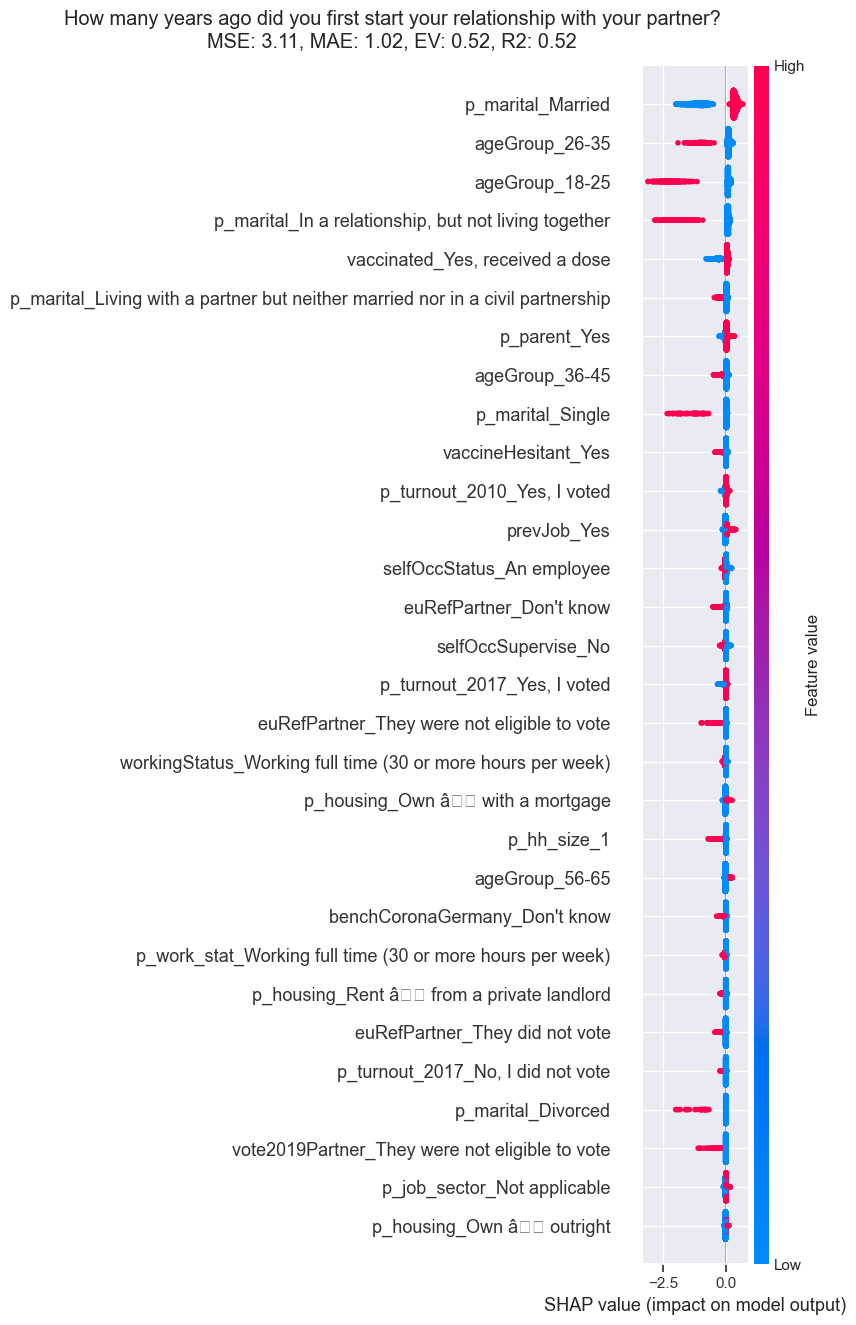

In [76]:
# marriageLength
name="marriageLength"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)